In [216]:
import plotly.express as px
import pandas as pd
from urllib.request import urlopen
import json
import numpy as np

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQxxmZm6YG54VucQ9yRgWFQXtOI-RFJ5-sOLT93LpaYGYc-vabL9LOzzkRXX-LmSROTA7hOL1C327nZ/pub?gid=213261502&single=true&output=csv')
data.head()

author author_type  \
0  Петербургская Строительная Компания   developer   
1  Петербургская Строительная Компания   developer   
2                               GloraX   developer   
3                        Группа Эталон   developer   
4                               GloraX   developer   

                                       link             city deal_type  \
0  https://spb.cian.ru/sale/flat/284740225/  Sankt-Peterburg      sale   
1  https://spb.cian.ru/sale/flat/280819981/  Sankt-Peterburg      sale   
2  https://spb.cian.ru/sale/flat/279507591/  Sankt-Peterburg      sale   
3  https://spb.cian.ru/sale/flat/285017335/  Sankt-Peterburg      sale   
4  https://spb.cian.ru/sale/flat/279351916/  Sankt-Peterburg      sale   

  accommodation_type  floor  floors_count  rooms_count  total_meters  \
0               flat      1             7          1.0         38.20   
1               flat     13            25          1.0         36.81   
2               flat      5            19          1.0         36.76   
3               flat     13            18          1.0         32.60   
4               flat     11            14          1.0         34.44   

   price_per_m2     price  year_of_construction  living_meters  \
0        419999  16044000                  2023           12.0   
1         33201   6706674                  2024           10.0   
2        265777   9769999                  2025           11.0   
3        303116   9881582                  2022           21.0   
4        322009  11089999                  2024           12.0   

   kitchen_meters         phone           district        street  \
0            12.0  7.812218e+10      Petrogradskij   Chkalovskoe   
1            13.0  7.812218e+10         Primorskij     Kolomjagi   
2            11.0  7.812213e+10   Vasileostrovskij       Morskoj   
3            -1.0  7.812213e+10     Admiraltejskij  Izmajlovskoe   
4            13.0  7.812213e+10  Krasnogvardejskij   Malaja Ohta   

               underground                   residential_complex  
0           Petrogradskaja                      Severnaja Korona  
1  Prospekt Prosveschenija                            Frends ZhK  
2                    Zenit  Gloraks Premium Vasileostrovskij ZhK  
3        Moskovskie vorota                     Kvartal Galaktika  
4              Ladozhskaja                      Glorax Zanevskij

In [7]:
data.district.nunique()

148

In [60]:
data[data.city == 'Moskva'].district.unique()

array(['Tverskoj', 'Rostokino', 'Ramenki', 'Jakimanka', 'Danilovskij',
       'Dorogomilovo', 'Krylatskoe', 'Horoshevo-Mnevniki',
       "Tekstil'schiki", 'Begovoj', 'Presnenskij', 'Hamovniki',
       'Pokrovskoe-Streshnevo', 'Horoshevskij', 'Golovinskij', nan,
       'Savelovskij', "Mar'ina roscha", 'Filevskij park', 'Alekseevskij',
       'Mozhajskij', 'Gagarinskij', 'Nagatinskij zaton',
       'Preobrazhenskoe', "Zamoskvorech'e", 'Ostankinskij', 'Arbat',
       'Zapadnoe Degunino', 'Aeroport', 'Ochakovo-Matveevskoe',
       'Troparevo-Nikulino', 'Sviblovo', 'Lefortovo', 'Pechatniki',
       'Meschanskij', 'Jaroslavskij', 'Taganskij', 'Nizhegorodskij',
       'Marfino', 'Chertanovo Juzhnoe', 'Schukino', 'Obruchevskij',
       'Cheremushki', 'Basmannyj', 'Nagatino-Sadovniki', 'Nekrasovka',
       'Fili-Davydkovo', 'Jasenevo', 'Juzhnoe Butovo', 'Molzhaninovskij',
       "Mar'ino", 'Kuntsevo', 'Hovrino', 'Strogino',
       'Birjulevo Vostochnoe', 'Bibirevo', 'Perovo',
       'Chertanovo

In [11]:
data[data.district == 'Prostornaja 4kkv v Primorskom e4-komn. kv.']

author        author_type  \
3831  Capital-Estate  real_estate_agent   

                                          link             city deal_type  \
3831  https://spb.cian.ru/sale/flat/283272356/  Sankt-Peterburg      sale   

     accommodation_type  floor  floors_count  rooms_count  total_meters  \
3831               flat      6            17          4.0         115.7   

      price_per_m2     price  year_of_construction  living_meters  \
3831        151253  17500000                  2012           67.4   

      kitchen_meters         phone  \
3831            10.2  7.981818e+10   

                                        district      street underground  \
3831  Prostornaja 4kkv v Primorskom e4-komn. kv.  6/17 etazh         NaN   

     residential_complex  
3831                 NaN

In [3]:
with open('D:/Загрузки/mo.geojson', 'r', encoding ='UTF-8') as f:
    msk_geojson = json.load(f)
msk_geojson

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'NAME': 'Киевский',
    'OKATO': '45298555',
    'OKTMO': '45945000',
    'NAME_AO': 'Троицкий',
    'OKATO_AO': '45298000',
    'ABBREV_AO': 'Троицкий',
    'TYPE_MO': 'Поселение'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[36.8031, 55.44083],
       [36.80319, 55.4416],
       [36.80357, 55.45162],
       [36.81253, 55.4514],
       [36.82745, 55.45134],
       [36.83337, 55.45138],
       [36.8338, 55.45164],
       [36.83458, 55.45126],
       [36.83486, 55.45142],
       [36.83499, 55.45149],
       [36.8358, 55.45112],
       [36.83606, 55.45116],
       [36.84616, 55.45104],
       [36.86029, 55.45089],
       [36.86494, 55.45064],
       [36.86084, 55.44927],
       [36.85826, 55.44785],
       [36.85829, 55.44766],
       [36.86, 55.44667],
       [36.86111, 55.4473],
       [36.86228, 55.446

In [61]:
# district_dict = {}
# for i in range(len(msk_geojson['features'])):
#     district_dict[msk_geojson['features'][i]['properties']['OKATO']] = [msk_geojson['features'][i]['properties']['NAME'],
#                                                                         msk_geojson['features'][i]['properties']['TYPE_MO']]
# district_dict
district_dict = {}
for i in range(len(msk_geojson['features'])):
    district_dict[msk_geojson['features'][i]['properties']['OKATO']] = [i+1,
                                                                        msk_geojson['features'][i]['properties']['TYPE_MO'],
                                                                        msk_geojson['features'][i]['properties']['NAME']]
district_dict

{'45298555': [1, 'Поселение', 'Киевский'],
 '45268595': [2, 'Муниципальный округ', 'Филёвский Парк'],
 '45298567': [3, 'Поселение', 'Новофёдоровское'],
 '45298575': [4, 'Поселение', 'Роговское'],
 '45297568': [5, 'Поселение', '"Мосрентген"'],
 '45298553': [6, 'Поселение', 'Вороновское'],
 '45298564': [7, 'Поселение', 'Михайлово-Ярцевское'],
 '45297562': [8, 'Поселение', 'Марушкинское'],
 '45298572': [9, 'Поселение', 'Первомайское'],
 '45272562': [10, 'Муниципальный округ', 'Матушкино'],
 '45268552': [11, 'Муниципальный округ', 'Внуково'],
 '45272568': [12, 'Муниципальный округ', 'Савёлки'],
 '45297552': [13, 'Поселение', 'Внуковское'],
 '45272572': [14, 'Муниципальный округ', 'Силино'],
 '45297559': [15, 'Поселение', 'Кокошкино'],
 '45272580': [16, 'Муниципальный округ', 'Крюково'],
 '45283587': [17, 'Муниципальный округ', 'Щукино'],
 '45298561': [18, 'Поселение', 'Краснопахорское'],
 '45296573': [19, 'Муниципальный округ', 'Нагатинский Затон'],
 '45272576': [20, 'Муниципальный округ',

In [63]:
from_gjson = pd.DataFrame.from_dict(district_dict, 
                                    orient = 'index', 
                                    columns = ['value','type','name']).reset_index()
from_gjson = from_gjson.drop(from_gjson[from_gjson['type'] == 'Поселение'].index, axis =0)
from_gjson.head()

index  value                 type            name
1   45268595      2  Муниципальный округ  Филёвский Парк
9   45272562     10  Муниципальный округ       Матушкино
10  45268552     11  Муниципальный округ         Внуково
11  45272568     12  Муниципальный округ         Савёлки
13  45272572     14  Муниципальный округ          Силино

In [19]:
# state_geo = msk_geojson
# state_data = from_gjson

# m = folium.Map(location=[48, -102], zoom_start=3)

# folium.Choropleth(
#     geo_data=msk_geojson,
#     name="choropleth",
#     data=from_gjson,
#     columns=["index", "value"],
#     key_on="feature.properties.OKATO",
#     fill_color="YlGn",
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name="Unemployment Rate (%)",
# ).add_to(m)

# folium.LayerControl().add_to(m)

# m

In [51]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
#https://www.irn.ru/kvartiry/moskva/ceny-po-rayonam/?prn=1
with open('D:/Загрузки/html_prices.html', encoding = 'utf-8') as f:
    html = f.read()
    
soup = BeautifulSoup(html, "html.parser")

# Нахождение таблицы на странице
table = soup.find("table")

# Преобразование таблицы в датафрейм pandas
df = pd.read_html(str(table))[0]

# Вывод результата
#df['Рейтинг районов и метро Москвы по стоимости квартир, руб./кв.м.  (www.irn.ru)  Это средняя цена квадратного метра жилья по районам.  Подробнее']

In [123]:
data_mean_priceperm2 = df['Рейтинг районов и метро Москвы по стоимости квартир, руб./кв.м.  (www.irn.ru)  Это средняя цена квадратного метра жилья по районам.  Подробнее'][['районы','Апр 23']]
data_mean_priceperm2

районы   Апр 23
0                                           Остоженка  479 091
1                                               Арбат  466 116
2                                            Тверской  457 588
3                                            Якиманка  454 877
4                                        Центр Москвы  448 498
..                                                ...      ...
81                           Вешняки, Выхино-Жулебино  202 646
82                                       Южное Бутово  198 562
83   Жулебино, Кожухово, Косино-Ухтомский, Некрасовка  194 846
84              Бирюлево Восточное, Бирюлево Западное  192 997
85  Зеленоград:  Крюково, Матушкино, Савёлки, Сили...  181 278

[86 rows x 2 columns]

In [124]:
new_data = data_mean_priceperm2['районы'].str.split(',', expand =True) \
                        .stack().reset_index(level=1,drop =True) \
                        .rename('районы')
data_mean_priceperm2 = pd.merge(data_mean_priceperm2.drop('районы', axis =1),new_data, left_index=True,right_index=True)
data_mean_priceperm2

Апр 23                районы
0   479 091             Остоженка
1   466 116                 Арбат
2   457 588              Тверской
3   454 877              Якиманка
4   448 498          Центр Москвы
..      ...                   ...
85  181 278  Зеленоград:  Крюково
85  181 278             Матушкино
85  181 278               Савёлки
85  181 278                Силино
85  181 278        Старое Крюково

[129 rows x 2 columns]

In [125]:
data_mean_priceperm2['Апр 23'] = data_mean_priceperm2['Апр 23'].str.replace(u'\xa0','').astype('int')
data_mean_priceperm2.rename(columns = {'Апр 23':'Цена за м2'}, inplace =True)

In [128]:
data_mean_priceperm2['районы'] = data_mean_priceperm2['районы'].str.replace('ё','е')

In [195]:
data_mean_priceperm2.loc[data_mean_priceperm2['районы'] =='Филевский парк','районы'] = 'Филевский Парк'
data_mean_priceperm2.loc[data_mean_priceperm2['районы'] =='Зеленоград:  Крюково','районы'] = 'Крюково'
data_mean_priceperm2.loc[data_mean_priceperm2['районы'] =='Марьина роща','районы'] = 'Марьина Роща'
data_mean_priceperm2.loc[data_mean_priceperm2['районы'] =='Соколиная гора','районы'] = 'Соколиная Гора'


In [178]:
data_mean_priceperm2['районы'] = data_mean_priceperm2['районы'].str.lstrip()

In [145]:
from_gjson.name = from_gjson.name.str.replace('ё','е')

In [201]:
full_data = pd.merge(data_mean_priceperm2,from_gjson, left_on = 'районы',right_on ='name')
full_data.drop(['value','type'], inplace =True, axis =1)

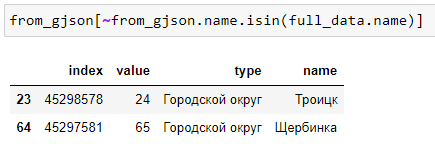

In [219]:
new_data = pd.DataFrame(np.array([[101970,'Троицк','45298578','Троицк'],
                                  [146799,'Щербинка','45297581','Щербинка']]), 
                        columns = ['Цена за м2','районы','index','name'])
full_data = pd.concat([full_data,new_data],ignore_index=True)
full_data

Цена за м2          районы     index            name
0       466116           Арбат  45286552           Арбат
1       457588        Тверской  45286585        Тверской
2       454877        Якиманка  45286596        Якиманка
3       433399       Хамовники  45286590       Хамовники
4       370976     Пресненский  45286575     Пресненский
..         ...             ...       ...             ...
122     181278         Савелки  45272568         Савелки
123     181278          Силино  45272572          Силино
124     181278  Старое Крюково  45272576  Старое Крюково
125     101970          Троицк  45298578          Троицк
126     146799        Щербинка  45297581        Щербинка

[127 rows x 4 columns]

In [221]:
full_data.drop(['районы'], axis = 1, inplace =True)

In [220]:
from_gjson[~from_gjson.name.isin(full_data.name)]

Empty DataFrame
Columns: [index, value, type, name]
Index: []

In [222]:
data_mean_priceperm2[~data_mean_priceperm2['районы'].isin(full_data.name)]
# Жулебино уже есть
# Остоженка в Хамовниках
# Центр тоже
# Кожухово в Косино-Ухтомском

Цена за м2        районы
0       479091     Остоженка
4       448498  Центр Москвы
83      194846      Жулебино
83      194846      Кожухово

In [241]:
full_data['Цена за м2'] = full_data['Цена за м2'].astype('int')

In [248]:
import plotly.colors as colors
custom_color = colors.sequential.Plasma

fig = px.choropleth_mapbox(full_data, 
                           geojson=msk_geojson, 
                           locations='index', 
                           color='Цена за м2',
                           color_continuous_scale=custom_color,
                           featureidkey = 'properties.OKATO',
                           mapbox_style="carto-positron",
                           zoom=8.5, 
                           center = {"lat": 55.75, "lon":37.61},
                           opacity=0.2,
                           range_color=(full_data['Цена за м2'].min(), full_data['Цена за м2'].max()),
                           labels={'Цена за м2':'Цена квадратного метра жилья'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(render = 'notebook')